# **DATA MINING PROJECT VİRA BİSMİLLAH**

While starting uploading to colab


In [ ]:
from google.colab import files
from google.colab import drive


# Dosyaları yükle
uploaded = files.upload()


Saving product_catalog_reduced_further.csv to product_catalog_reduced_further.csv
Saving product_category_map_reduced (1).csv to product_category_map_reduced (1).csv


**Adım1: Libraries**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


**Show all missing value rates for EDA**

attribute_1 sütununda 0 değer oranı: 0.01%
attribute_2 sütununda 0 değer oranı: 36.57%
attribute_3 sütununda 0 değer oranı: 0.02%
attribute_4 sütununda 0 değer oranı: 70.48%
attribute_5 sütununda 0 değer oranı: 0.58%


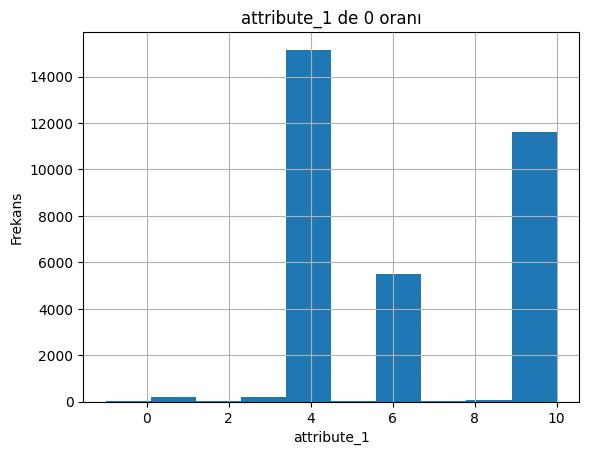

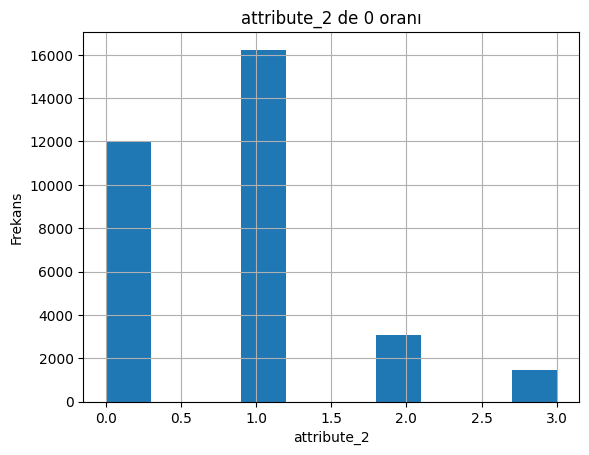

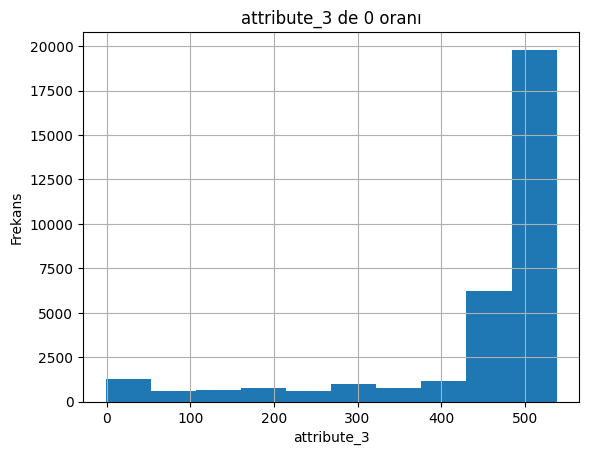

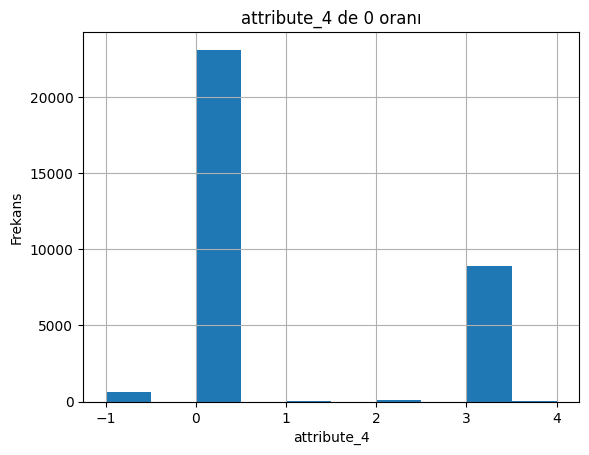

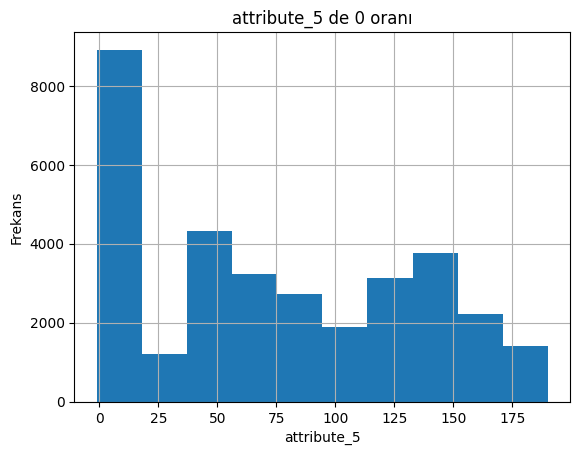

In [ ]:
# Load datasets
product_catalog = pd.read_csv("product_catalog.csv")
product_category_map = pd.read_csv("product_category_map.csv")
# 0'ların attributelardaki oranını bulma

import matplotlib.pyplot as plt

# Attribute sütunundaki 0 değerlerin oranını kontrol et
for attr in ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']:
    zero_ratio = (product_catalog[attr] == 0).sum() / len(product_catalog) * 100
    print(f"{attr} sütununda 0 değer oranı: {zero_ratio:.2f}%")

# Attribute'ları liste olarak tanımlıyoruz
attributes = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

# Her bir attribute için histogram çizdiriyoruz
for attribute in attributes:
    product_catalog[attribute].hist()
    plt.title(f'{attribute} de 0 oranı')
    plt.xlabel(attribute)
    plt.ylabel('Frekans')
    plt.show()



attribute_1 sütununda -1 değer oranı: 0.01%
attribute_2 sütununda -1 değer oranı: 0.00%
attribute_3 sütununda -1 değer oranı: 1.42%
attribute_4 sütununda -1 değer oranı: 1.88%
attribute_5 sütununda -1 değer oranı: 13.01%


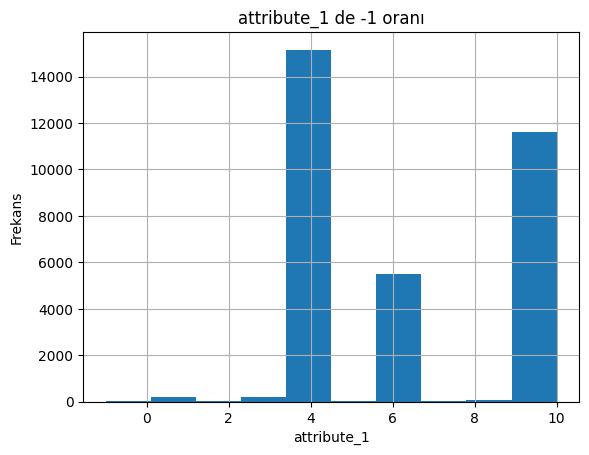

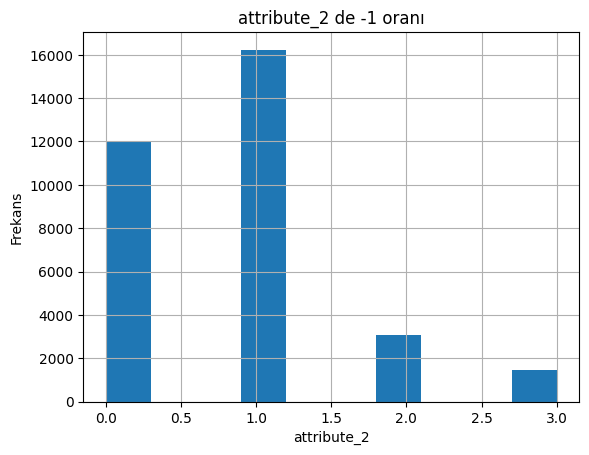

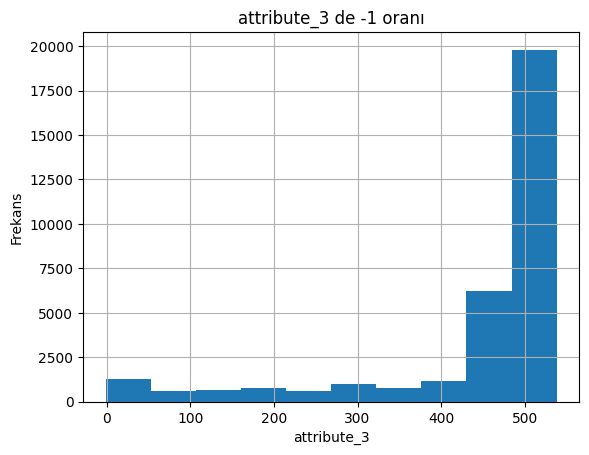

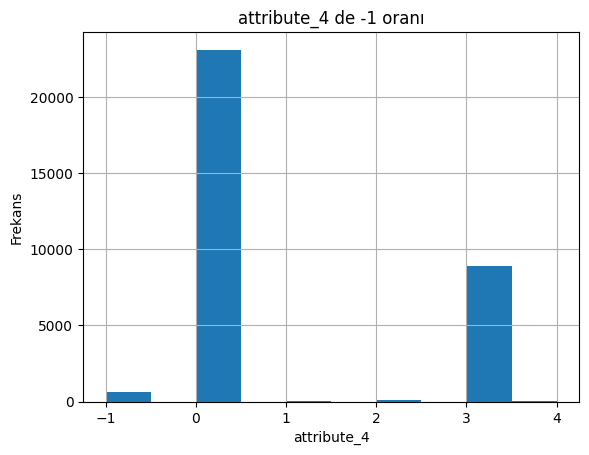

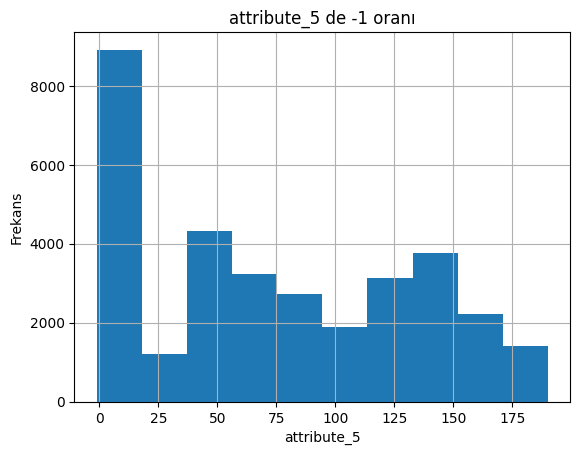

In [ ]:
# 0'ların attributelardaki oranını bulma

import matplotlib.pyplot as plt

# Attribute sütunundaki -1 değerlerin oranını kontrol et
for attr in ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']:
    zero_ratio = (product_catalog[attr] == -1).sum() / len(product_catalog) * 100
    print(f"{attr} sütununda -1 değer oranı: {zero_ratio:.2f}%")

# Attribute'ları liste olarak tanımlıyoruz
attributes = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

# Her bir attribute için histogram çizdiriyoruz
for attribute in attributes:
    product_catalog[attribute].hist()
    plt.title(f'{attribute} de -1 oranı')
    plt.xlabel(attribute)
    plt.ylabel('Frekans')
    plt.show()


The ratio of missing values in categories column

In [ ]:
import matplotlib.pyplot as plt

# Attribute sütunlarının listesi
attributes = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

# Categories sütunundaki boş satır oranını bulma
empty_categories_ratio = product_catalog['categories'].isna().sum() / len(product_catalog) * 100
print(f"'categories' sütununda boş satır oranı: {empty_categories_ratio:.2f}%")



'categories' sütununda boş satır oranı: 20.71%


# more EDA

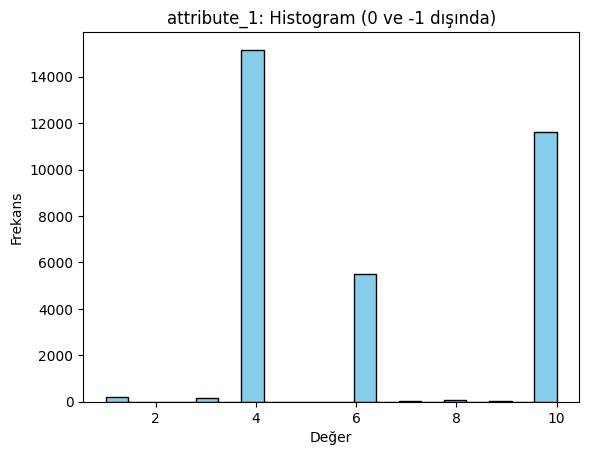

Analysis for attribute_1:
Benzersiz değerlerin sıklığı ↓
attribute_1
4     15164
10    11611
6      5496
1       191
3       178
8        63
7        37
9        19
5         7
2         4
Name: count, dtype: int64
attribute_1 mod değeri: 4
attribute_1 medyan değeri: 6.0




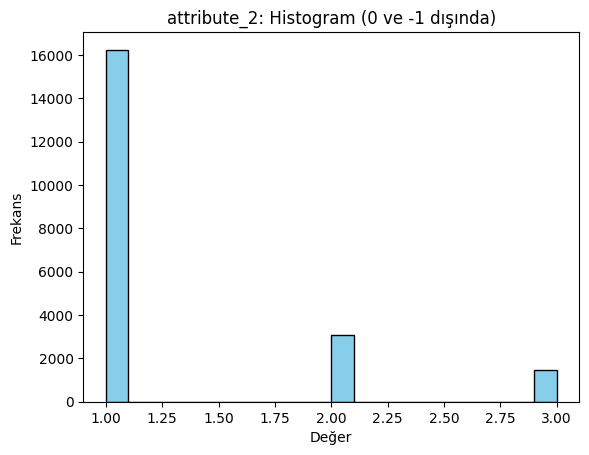

Analysis for attribute_2:
Benzersiz değerlerin sıklığı ↓
attribute_2
1    16238
2     3085
3     1467
Name: count, dtype: int64
attribute_2 mod değeri: 1
attribute_2 medyan değeri: 1.0




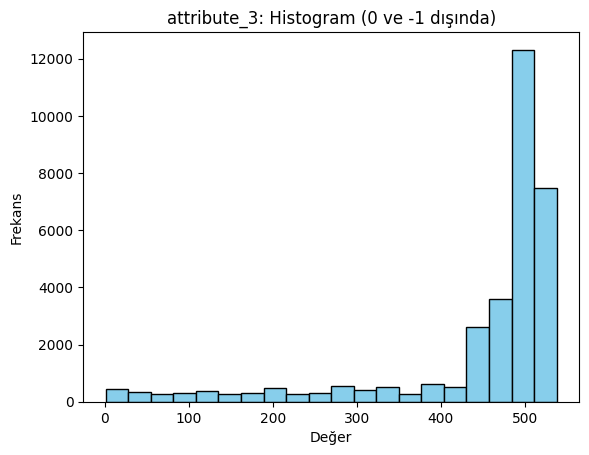

Analysis for attribute_3:
Benzersiz değerlerin sıklığı ↓
attribute_3
536    3964
503    3015
491    2799
487     890
474     808
       ... 
127       1
326       1
246       1
153       1
364       1
Name: count, Length: 538, dtype: int64
attribute_3 mod değeri: 536
attribute_3 medyan değeri: 491.0




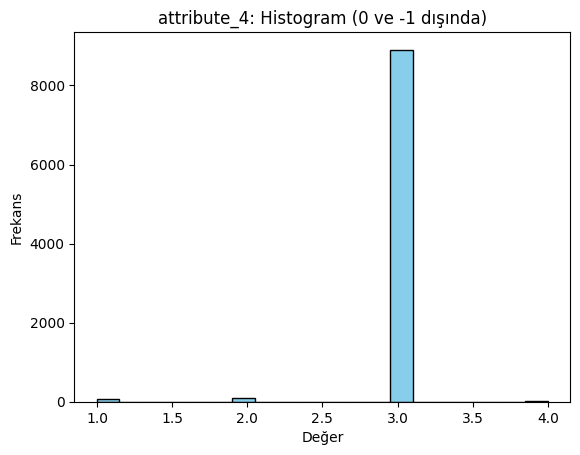

Analysis for attribute_4:
Benzersiz değerlerin sıklığı ↓
attribute_4
3    8905
2      82
1      58
4      14
Name: count, dtype: int64
attribute_4 mod değeri: 3
attribute_4 medyan değeri: 3.0




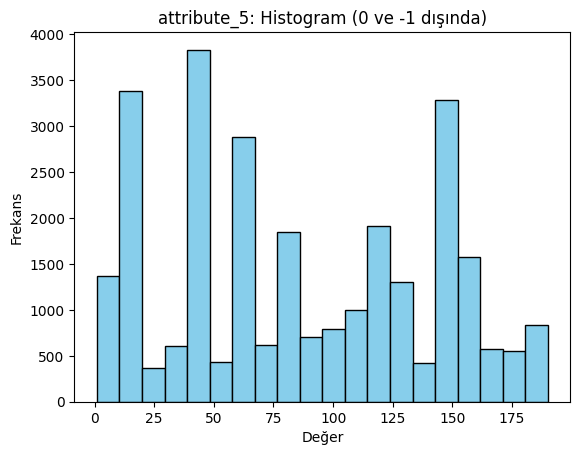

Analysis for attribute_5:
Benzersiz değerlerin sıklığı ↓
attribute_5
66     2556
144    2340
17     2069
46     1365
156    1113
       ... 
125       1
135       1
2         1
42        1
150       1
Name: count, Length: 190, dtype: int64
attribute_5 mod değeri: 66
attribute_5 medyan değeri: 83.0




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a function to apply the analysis on each attribute
def analyze_attribute(attribute_name, data):
    # Get values for the attribute excluding 0 and -1
    attribute_values = data[attribute_name].loc[~data[attribute_name].isin([0, -1])]

    # Get value counts for the unique values
    value_counts = attribute_values.value_counts()

    # Calculate mode and median
    mode_value = attribute_values.mode()[0]  # Mode
    median_value = attribute_values.median()  # Median

    # Plot histogram
    plt.hist(attribute_values, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"{attribute_name}: Histogram (0 ve -1 dışında)")
    plt.xlabel('Değer')
    plt.ylabel('Frekans')
    plt.show()
    # Print results
    print(f"Analysis for {attribute_name}:")
    print(f"Benzersiz değerlerin sıklığı ↓\n{value_counts}")
    print(f"{attribute_name} mod değeri: {mode_value}")
    print(f"{attribute_name} medyan değeri: {median_value}")
    print("\n")



# Apply the analysis to all attributes
attributes = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

for attribute in attributes:
    analyze_attribute(attribute, product_catalog)


### **ŞİMDİ ÇOK BÜYÜK DEĞERLERE NORMALİZASYON UYGULANIP DAHA ÖLÇEKLENEBİLİR HALE GETİRİLECEK VE HOMOJEN OLMAYAN DEĞERLERE DE MOD/MEDYAN/KNN UYGULAMASI YAPILIP ATTRİBUTELER DOLDURALACAK**

In [ ]:
...


Ellipsis

## Clean the data from pieces of chocolates

In [ ]:
# Reloading the main dataset with parent category column for filtering


# Ensure 'categories' is in list format
product_catalog['categories'] = product_catalog['categories'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Identify rows with missing categories
product_catalog['categories_missing'] = product_catalog['categories'].apply(lambda x: len(x) == 0)

# Identify rows with 0 or -1 in attributes
attribute_columns = [col for col in product_catalog.columns if col.startswith('attribute')]
product_catalog['attributes_with_zeros_neg_ones'] = product_catalog[attribute_columns].isin([0, -1]).any(axis=1)

# Filter rows that meet both conditions
filtered_data = product_catalog[
    product_catalog['categories_missing'] & product_catalog['attributes_with_zeros_neg_ones']
]

# Export the filtered dataframe to a CSV file
filtered_data.to_csv("filtered_data.csv", index=False)

# Notify the user where to find the output
print("Filtered data saved as 'filtered_data.csv'. You can download it.")


Filtered data saved as 'filtered_data.csv'. You can download it.


**Adım 2: Veriyi Yükle ve Birleştir**

In [ ]:


# Ensure both merge keys have the same data type
product_catalog['categories'] = product_catalog['categories'].astype(str)
product_category_map['category_id'] = product_category_map['category_id'].astype(str)

# Split categories lists into separate rows
# Remove brackets and split by comma, then explode into separate rows
product_catalog['categories'] = product_catalog['categories'].str.strip('[]').str.split(', ')
product_catalog = product_catalog.explode('categories')

# Trim any extra whitespace and ensure categories are strings
product_catalog['categories'] = product_catalog['categories'].str.strip()
product_catalog['categories'] = product_catalog['categories'].astype(str)

# Merge with product_category_map to add parent_category information
product_catalog = product_catalog.merge(
    product_category_map,
    left_on='categories',
    right_on='category_id',
    how='left'
).rename(columns={'parent_category_id': 'parent_category'})

# Fill any remaining NaN values in parent_category if necessary
product_catalog['parent_category'] = product_catalog['parent_category'].fillna('Unknown')

product_catalog = product_catalog.drop(columns=['category_id'])
# Veri çerçevesinin ilk 5 satırını görüntüle
product_catalog.head()


# Veri çerçevesindeki sütunları listele
#print(product_catalog.columns)


,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,categories_missing,attributes_with_zeros_neg_ones,parent_category
0,22665,861,4,0,490,2,66,,True,True,Unknown
1,28640,1366,10,1,537,0,101,,True,True,Unknown
2,13526,1090,10,0,511,0,0,,True,True,Unknown
3,21399,1090,10,1,511,0,0,,True,True,Unknown
4,8504,768,4,1,484,0,66,,True,True,Unknown


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['manufacturer_id'].plot(kind='hist', bins=20, title='manufacturer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['attribute_1'].plot(kind='hist', bins=20, title='attribute_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='product_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='product_id', y='manufacturer_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='manufacturer_id', y='attribute_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='attribute_1', y='attribute_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['product_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('product_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['manufacturer_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('manufacturer_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['attribute_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('attribute_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['attribute_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('attribute_2')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['product_id'].plot(kind='line', figsize=(8, 4), title='product_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['manufacturer_id'].plot(kind='line', figsize=(8, 4), title='manufacturer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['attribute_1'].plot(kind='line', figsize=(8, 4), title='attribute_1')
plt.gca().spines[['top', 'right']].set_visible(False)

**Adım 3: Kategorik Verileri Encode Et**

In [ ]:
# Eksik categories değerlerini -1 olarak işaretle
product_catalog['categories'] = product_catalog['categories'].fillna(-1)
# parent_category sütunundaki Unknown değerlerini -1 olarak işaretle
product_catalog['parent_category'] = product_catalog['parent_category'].replace('Unknown', -1)



<ipython-input-5-d21e7a04800d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  product_catalog['parent_category'] = product_catalog['parent_category'].replace('Unknown', -1)


**Adım 4: Eksik ve Eksiksiz Verileri Ayır**

In [ ]:
# Eksik categories değerlerini -1 olarak işaretle
# Sütunun veri tipini float olarak değiştir
product_catalog['categories'] = product_catalog['categories'].astype(float)

# Eksik değerleri -1 ile doldur
product_catalog['categories'] = product_catalog['categories'].fillna(-1)

# Eksik değerlerin tamamlandığını kontrol et
print("Eksik değerler (sonrası):", product_catalog['categories'].isnull().sum())


print(product_catalog['categories'].dtype)          # Veri tipini kontrol et


# parent_category sütunundaki Unknown değerlerini -1 olarak işaretle
product_catalog['parent_category'] = product_catalog['parent_category'].replace('Unknown', -1)


# Eksiksiz ve eksik verileri ayır
training_data = product_catalog[product_catalog['categories'] != -1]  # Eksiksiz veriler
prediction_data = product_catalog[product_catalog['categories'] == -1]  # Eksik veriler


Eksik değerler (sonrası): 0
float64


**Adım 5: Özellik ve Hedef Belirleme**

In [ ]:
# Özellik ve hedef sütunlarını seç
features = ['manufacturer_id', 'attribute_1', 'attribute_2',
       'attribute_3', 'attribute_4', 'attribute_5', 'categories',
       'parent_category']
X_train = training_data[features]
y_train = training_data['categories']  # Hedef sütun

X_predict = prediction_data[features]  # Tahmin edilecek satırların özellikleri
product_catalog.head(20)


,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,parent_category
0,22665,861,4,0,490,2,66,2890.0,2832.0
1,22665,861,4,0,490,2,66,855.0,1178.0
2,22665,861,4,0,490,2,66,3908.0,3898.0
3,22665,861,4,0,490,2,66,3909.0,3898.0
4,28640,1366,10,1,537,0,101,-1.0,-1.0
5,13526,1090,10,0,511,0,0,3270.0,1420.0
6,13526,1090,10,0,511,0,0,163.0,3860.0
7,13526,1090,10,0,511,0,0,284.0,600.0
8,13526,1090,10,0,511,0,0,1694.0,600.0
9,13526,1090,10,0,511,0,0,12.0,3241.0


**Adım 6: Random Forest Modeli Kur ve Eğit**

In [ ]:
# Random Forest modelini oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1,
                       random_state=42)

**Adım 7: Eksik Değerleri Tahmin Et**

In [ ]:
# Eksik categories değerlerini tahmin et
predicted_categories = rf_model.predict(X_predict)

# Tahmin edilen değerleri orijinal kategorilere çevir
predicted_labels = le_categories.inverse_transform(predicted_categories)


NameError: name 'X_predict' is not defined

**Adım 8: Eksik Verileri Tamamla**

In [ ]:
# Eksik categories sütununu tahmin edilen değerlerle doldur
product_catalog.loc[prediction_data.index, 'categories'] = predicted_labels


NameError: name 'predicted_labels' is not defined

**Adım 9: Sonuçları Kontrol Et ve Kaydet**

In [ ]:
# Eksik değerleri kontrol et
remaining_missing = product_catalog['categories'].isnull().sum()
print(f"Remaining missing values in 'categories': {remaining_missing}")

# Düzenlenmiş veriyi yeni bir dosyaya kaydet
product_catalog.to_csv("/mnt/data/product_catalog_filled.csv", index=False)
print("Eksik veriler tamamlandı ve yeni dosya 'product_catalog_filled.csv' olarak kaydedildi.")


NameError: name 'product_catalog' is not defined

BOŞLUK

BOŞLUK

BOŞLUK

# **ANN**

In [ ]:
from google.colab import files
from google.colab import drive

uploaded = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# 1-Input Layer
# 2-Hidden Layers
# 3-Output Layer
# 4-Loss Function
# 5-Optimization

İlk adım: transactions.csv'den sadece bir müşterinin daha önce aldığı ürüne bakılarak o ürünü birdaha ne zaman alacağı tahmin edilecek.

İkinci adım: Bir müşterinin daha önce almadığı bir ürünü, satın alma alışkanlıklarına bakılarak (attributelar ya da categoryler ile ilişki kurularak) ileride alıp almayacağı tahmin edilecek.

In [ ]:
# COMMAND LİNE'LAR İNGİLİZCEYE ÇEVRİLECEK
# DATANIN SON HALİ GELDİĞİNDE, DOSYADAKİ FORMAT FARKINDAN KAYNAKLANAN HATALAR İÇİN KODU YENİ FORMATA UYGUN HALE GETİRMEK GEREKEBİLİR

In [ ]:
# transactions.csv
transactions = pd.read_csv('transactions.csv')

# tarih formatına çevir
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

# müşteri ve ürün bazında satın alma tarihlerini sırala
transactions = transactions.sort_values(by=['customer_id', 'product_id', 'purchase_date'])

# satın alma tarihleri arasındaki farkı hesaplama (gün bazında)
transactions['days_since_last_purchase'] = transactions.groupby(['customer_id', 'product_id'])['purchase_date'].diff().dt.days

# ortalama satın alma aralığı
avg_purchase_interval = transactions.groupby(['customer_id', 'product_id'])['days_since_last_purchase'].mean().reset_index(name='avg_purchase_interval')

# Son satın alma tarihini bul
last_purchase_dates = transactions.groupby(['customer_id', 'product_id'])['purchase_date'].max().reset_index()
avg_purchase_interval = avg_purchase_interval.merge(last_purchase_dates, on=['customer_id', 'product_id'], how='left')

# Son satın alma tarihinden itibaren tahmin edilen haftayı hesaplama
def predict_next_purchase(avg_interval):
    if avg_interval > 28:
        return 0  # Ortalama aralık 28 günden fazlaysa, 4 hafta içinde alınmaz
    else:
        weeks = avg_interval // 7  # Ortalama satın alma aralığını haftaya çevir
        if weeks < 1:
            return 1  # 1. hafta içinde alınır
        elif weeks < 2:
            return 2  # 2. hafta içinde alınır
        elif weeks < 3:
            return 3  # 3. hafta içinde alınır
        else:
            return 4  # 4. hafta içinde alınır

# Tahmin sütunu oluşturma
avg_purchase_interval['prediction'] = avg_purchase_interval['avg_purchase_interval'].apply(predict_next_purchase)

# Sonuçları yazdırma
print(avg_purchase_interval[['customer_id', 'product_id', 'avg_purchase_interval', 'purchase_date', 'prediction']].head())

# Tahminleri CSV dosyasına kaydetme
avg_purchase_interval[['customer_id', 'product_id', 'prediction']].to_csv('next_purchase_predictions.csv', index=False)


   customer_id  product_id  avg_purchase_interval purchase_date  prediction
0            0        1505                    NaN    2020-09-01           4
1            0        6446                   35.0    2021-01-15           0
2            0        9325                    NaN    2020-11-20           4
3            0       12468                    NaN    2020-08-03           4
4            0       12505                    NaN    2020-08-18           4


# **DATA PREPARATION**

In [ ]:
# load the dataset
transactions = pd.read_csv('transactions.csv')

# purchase_date column'unu tarih formatına çeviriyoruz
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])

# müşteri-ürün bazında satın alma sıklığı (satın alma sayısı)
frequency = transactions.groupby(['customer_id', 'product_id']).size().reset_index(name='purchase_frequency')

# son satın alma tarihi (sıklıktan sonra prediction için)
last_purchase = transactions.groupby(['customer_id', 'product_id'])['purchase_date'].max().reset_index(name='last_purchase_date')

# satın alma aralığı (kaç günde bir alıyor)